In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
import numpy as np
import pandas as pd
import csv

Explore data

In [57]:
digits_train = pd.read_csv(
    "train.csv")

x_train = digits_train.copy()
y_train = x_train.pop('label')

x_val, y_val = x_train[-2100:], y_train[-2100:]
x_train, y_train = x_train[:-2100], y_train[:-2100]


In [54]:

print(x_train.shape)
print(y_train.shape)


(39900, 784)
(39900,)


Explore digits in matplot

1
0
1
4
0


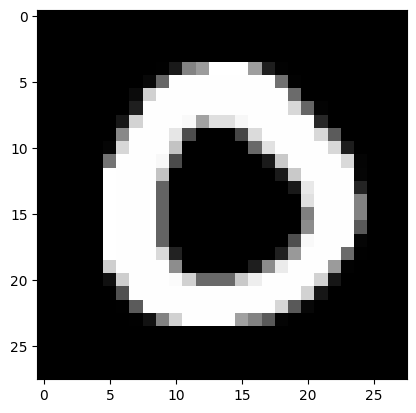

In [34]:
for i in range(5):
  print(y_train.iloc[i])
  reshape = pd.DataFrame(x_train.iloc[i].values.reshape(28, 28))
  plt.imshow(reshape, cmap='gray')

Build NN

In [58]:

model = Sequential([
tf.keras.layers.Input(shape=[784]),
Normalization(),
Dense(300, activation="relu"),
Dense(100, activation="relu"),
Dense(10, activation="softmax")])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 784)              1569      
 n)                                                              
                                                                 
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 268,179
Trainable params: 266,610
Non-trainable params: 1,569
_________________________________________________________________


In [59]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

In [60]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1247/1247 [==============================] - 6s 5ms/step - loss: 2920691269632.0000 - accuracy: 0.1075 - val_loss: 2.3014 - val_accuracy: 0.1143
Epoch 2/30
1247/1247 [==============================] - 6s 5ms/step - loss: 2.3019 - accuracy: 0.1087 - val_loss: 2.3008 - val_accuracy: 0.1143
Epoch 3/30
1247/1247 [==============================] - 6s 4ms/step - loss: 2.3021 - accuracy: 0.1088 - val_loss: 2.3021 - val_accuracy: 0.1143
Epoch 4/30
1247/1247 [==============================] - 6s 5ms/step - loss: 2.3022 - accuracy: 0.1101 - val_loss: 2.2999 - val_accuracy: 0.1143
Epoch 5/30
1247/1247 [==============================] - 6s 5ms/step - loss: 2.3020 - accuracy: 0.1089 - val_loss: 2.2996 - val_accuracy: 0.1143
Epoch 6/30
1247/1247 [==============================] - 5s 4ms/step - loss: 2.3019 - accuracy: 0.1110 - val_loss: 2.3021 - val_accuracy: 0.1143
Epoch 7/30
1247/1247 [==============================] - 7s 6ms/step - loss: 2.3020 - accuracy: 0.1094 - val_loss: 2.3006 - v

Predictions for test data

In [68]:
x_test = pd.read_csv("test.csv")

print(x_test.shape)

y_test = model.predict(x_test)

y_pred = y_test.argmax(axis=-1)



(28000, 784)
875/875 [==============================] - 2s 2ms/step


In [66]:
y_pred[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Store to CSV

In [72]:
with open('predictions.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ImageId','Label'])
    for i in range(y_pred.size):
        writer.writerow([i + 1, y_pred[i]])